In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers import BatchNormalization 
from keras.utils import np_utils


In [3]:
data = pd.read_csv('iris.csv')
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\panir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\panir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\panir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\panir\anacond

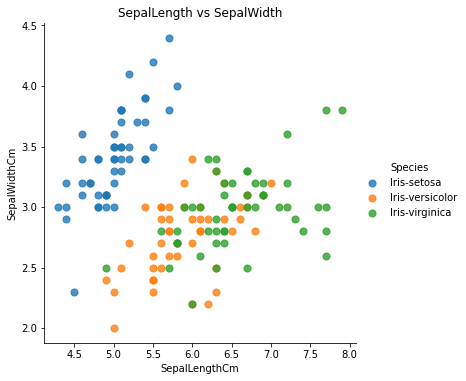

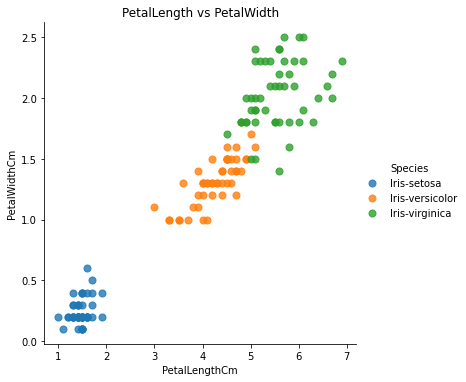

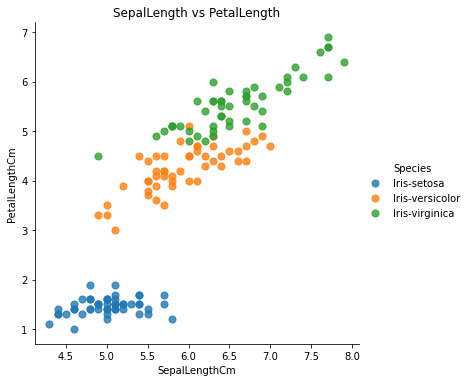

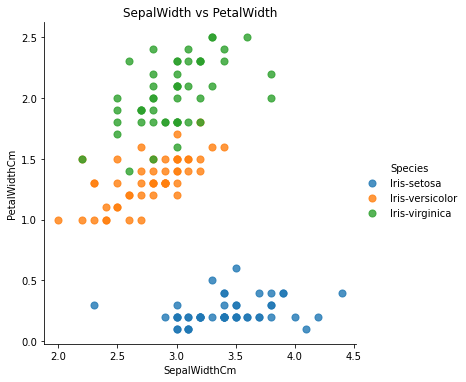

In [8]:
sns.lmplot('SepalLengthCm', 'SepalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('PetalLengthCm', 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('SepalLengthCm', 'PetalLengthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('SepalWidthCm', 'PetalWidthCm',
           data=data,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

In [9]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [12]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
65    66            6.7           3.1            4.4           1.4       1
113  114            5.7           2.5            5.0           2.0       2
41    42            4.5           2.3            1.3           0.3       0
20    21            5.4           3.4            1.7           0.2       0
104  105            6.5           3.0            5.8           2.2       2


In [13]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[6.7 3.1 4.4 1.4]
 [5.7 2.5 5.  2. ]
 [4.5 2.3 1.3 0.3]]
Examples of y
 [1 2 0]


In [15]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.09269994 0.082062   0.0865746  0.08052096]
 [0.07886413 0.06617903 0.09838022 0.11502995]
 [0.06226115 0.06088471 0.02557886 0.01725449]]


In [16]:
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [18]:
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [19]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              5000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [20]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=200,verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 38ms/step - loss: 1.0814 - accuracy: 0.4833 - val_loss: 1.0399 - val_accuracy: 0.7000
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 0.9994 - accuracy: 0.6583 - val_loss: 0.9008 - val_accuracy: 0.7000
Epoch 3/200
6/6 [==============================] - 0s 17ms/step - loss: 0.8502 - accuracy: 0.7167 - val_loss: 0.7021 - val_accuracy: 0.7000
Epoch 4/200
6/6 [==============================] - 0s 18ms/step - loss: 0.6480 - accuracy: 0.7250 - val_loss: 0.5237 - val_accuracy: 0.9000
Epoch 5/200
6/6 [==============================] - 0s 16ms/step - loss: 0.4660 - accuracy: 0.8583 - val_loss: 0.3565 - val_accuracy: 0.9667
Epoch 6/200
6/6 [==============================] - 0s 14ms/step - loss: 0.3408 - accuracy: 0.9667 - val_loss: 0.2556 - val_accuracy: 0.9667
Epoch 7/200
6/6 [==============================] - 0s 18ms/step - loss: 0.2529 - accuracy: 0.9417 - val_loss: 0.1909 - val_accuracy: 1.0000
Epoch 8/200
6/6 [===

6/6 [==============================] - 0s 12ms/step - loss: 0.0711 - accuracy: 0.9667 - val_loss: 0.0507 - val_accuracy: 0.9667
Epoch 60/200
6/6 [==============================] - 0s 15ms/step - loss: 0.1631 - accuracy: 0.9333 - val_loss: 0.1319 - val_accuracy: 0.9667
Epoch 61/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0638 - accuracy: 0.9833 - val_loss: 0.0548 - val_accuracy: 0.9667
Epoch 62/200
6/6 [==============================] - 0s 14ms/step - loss: 0.1228 - accuracy: 0.9500 - val_loss: 0.0917 - val_accuracy: 0.9667
Epoch 63/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0826 - accuracy: 0.9833 - val_loss: 0.0615 - val_accuracy: 0.9667
Epoch 64/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0799 - accuracy: 0.9667 - val_loss: 0.0543 - val_accuracy: 0.9667
Epoch 65/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0786 - accuracy: 0.9583 - val_loss: 0.0705 - val_accuracy: 0.9667
Epoch 66/200
6/6 [========

6/6 [==============================] - 0s 13ms/step - loss: 0.0575 - accuracy: 0.9917 - val_loss: 0.0649 - val_accuracy: 0.9667
Epoch 118/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0595 - accuracy: 0.9750 - val_loss: 0.0464 - val_accuracy: 0.9667
Epoch 119/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1054 - accuracy: 0.9417 - val_loss: 0.0679 - val_accuracy: 0.9667
Epoch 120/200
6/6 [==============================] - 0s 12ms/step - loss: 0.1493 - accuracy: 0.9333 - val_loss: 0.0538 - val_accuracy: 0.9667
Epoch 121/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0804 - accuracy: 0.9500 - val_loss: 0.0453 - val_accuracy: 0.9667
Epoch 122/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0605 - accuracy: 0.9667 - val_loss: 0.0887 - val_accuracy: 0.9667
Epoch 123/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0552 - accuracy: 0.9667 - val_loss: 0.0409 - val_accuracy: 0.9667
Epoch 124/200
6/6 [==

Epoch 175/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1121 - accuracy: 0.9500 - val_loss: 0.1180 - val_accuracy: 0.9667
Epoch 176/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0432 - accuracy: 0.9833 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 177/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0728 - accuracy: 0.9583 - val_loss: 0.0986 - val_accuracy: 0.9667
Epoch 178/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0589 - accuracy: 0.9667 - val_loss: 0.0575 - val_accuracy: 0.9667
Epoch 179/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0484 - accuracy: 0.9750 - val_loss: 0.0463 - val_accuracy: 0.9667
Epoch 180/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0607 - accuracy: 0.9667 - val_loss: 0.0715 - val_accuracy: 0.9667
Epoch 181/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0604 - accuracy: 0.9750 - val_loss: 0.0500 - val_accuracy: 0.9667
Epoch 

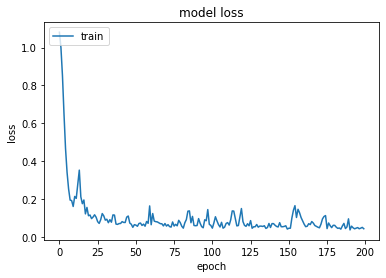

In [21]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_pred = model.predict(X_test)
y_pred = y_pred>0.5

In [25]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



In [27]:
from sklearn.metrics import multilabel_confusion_matrix

cm = multilabel_confusion_matrix(y_test,y_pred)
print(cm)

[[[20  0]
  [ 0 10]]

 [[21  0]
  [ 1  8]]

 [[18  1]
  [ 0 11]]]


In [28]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_6 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=200,verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 32ms/step - loss: 1.0970 - accuracy: 0.3833 - val_loss: 1.0950 - val_accuracy: 0.5667
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0946 - accuracy: 0.6667 - val_loss: 1.0933 - val_accuracy: 0.7000
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 1.0935 - accuracy: 0.6917 - val_loss: 1.0922 - val_accuracy: 0.9667
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 1.0924 - accuracy: 0.6417 - val_loss: 1.0913 - val_accuracy: 0.9333
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 1.0920 - accuracy: 0.6667 - val_loss: 1.0907 - val_accuracy: 0.9000
Epoch 6/200
6/6 [==============================] - 0s 11ms/step - loss: 1.0914 - accuracy: 0.7083 - val_loss: 1.0902 - val_accuracy: 0.9000
Epoch 7/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0908 - accuracy: 0.6167 - val_loss: 1.0897 - val_accuracy: 0.8667
Epoch 8/200
6/6 [====

6/6 [==============================] - 0s 8ms/step - loss: 1.0794 - accuracy: 0.6750 - val_loss: 1.0791 - val_accuracy: 0.6333
Epoch 60/200
6/6 [==============================] - 0s 9ms/step - loss: 1.0791 - accuracy: 0.6750 - val_loss: 1.0787 - val_accuracy: 0.6333
Epoch 61/200
6/6 [==============================] - 0s 9ms/step - loss: 1.0792 - accuracy: 0.6750 - val_loss: 1.0786 - val_accuracy: 0.6333
Epoch 62/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0793 - accuracy: 0.6750 - val_loss: 1.0783 - val_accuracy: 0.6333
Epoch 63/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0782 - accuracy: 0.6750 - val_loss: 1.0780 - val_accuracy: 0.6333
Epoch 64/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0774 - accuracy: 0.6750 - val_loss: 1.0779 - val_accuracy: 0.6333
Epoch 65/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0778 - accuracy: 0.6667 - val_loss: 1.0778 - val_accuracy: 0.6333
Epoch 66/200
6/6 [============

6/6 [==============================] - 0s 12ms/step - loss: 1.0635 - accuracy: 0.7083 - val_loss: 1.0628 - val_accuracy: 0.6333
Epoch 118/200
6/6 [==============================] - 0s 14ms/step - loss: 1.0630 - accuracy: 0.6833 - val_loss: 1.0623 - val_accuracy: 0.6333
Epoch 119/200
6/6 [==============================] - 0s 9ms/step - loss: 1.0628 - accuracy: 0.7083 - val_loss: 1.0621 - val_accuracy: 0.6333
Epoch 120/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0626 - accuracy: 0.7000 - val_loss: 1.0616 - val_accuracy: 0.6333
Epoch 121/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0623 - accuracy: 0.6917 - val_loss: 1.0612 - val_accuracy: 0.6333
Epoch 122/200
6/6 [==============================] - 0s 12ms/step - loss: 1.0616 - accuracy: 0.7000 - val_loss: 1.0609 - val_accuracy: 0.6333
Epoch 123/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0618 - accuracy: 0.6917 - val_loss: 1.0603 - val_accuracy: 0.6333
Epoch 124/200
6/6 [====

6/6 [==============================] - 0s 8ms/step - loss: 1.0329 - accuracy: 0.8250 - val_loss: 1.0311 - val_accuracy: 0.8333
Epoch 176/200
6/6 [==============================] - 0s 9ms/step - loss: 1.0329 - accuracy: 0.8583 - val_loss: 1.0302 - val_accuracy: 0.8667
Epoch 177/200
6/6 [==============================] - 0s 8ms/step - loss: 1.0326 - accuracy: 0.7667 - val_loss: 1.0293 - val_accuracy: 0.8667
Epoch 178/200
6/6 [==============================] - 0s 12ms/step - loss: 1.0323 - accuracy: 0.8083 - val_loss: 1.0285 - val_accuracy: 0.8667
Epoch 179/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0296 - accuracy: 0.8333 - val_loss: 1.0278 - val_accuracy: 0.8667
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 1.0304 - accuracy: 0.8417 - val_loss: 1.0272 - val_accuracy: 0.8667
Epoch 181/200
6/6 [==============================] - 0s 9ms/step - loss: 1.0282 - accuracy: 0.8667 - val_loss: 1.0262 - val_accuracy: 0.8667
Epoch 182/200
6/6 [======

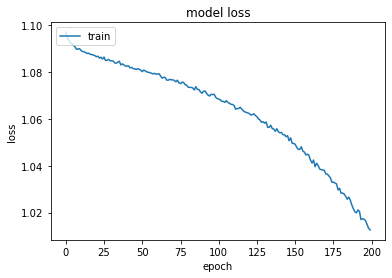

In [30]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred = model.predict(X_test)
y_pred = y_pred>0.5

In [32]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11

   micro avg       0.00      0.00      0.00        30
   macro avg       0.00      0.00      0.00        30
weighted avg       0.00      0.00      0.00        30
 samples avg       0.00      0.00      0.00        30



C:\Users\panir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
cm = multilabel_confusion_matrix(y_test,y_pred)
print(cm)

[[[20  0]
  [10  0]]

 [[21  0]
  [ 9  0]]

 [[19  0]
  [11  0]]]
